In [79]:
import pandas as pd

# this will skip rows 0–9, use row 10 as the header, and read everything below it
df = pd.read_excel("2024 January- March.xls", 
                   sheet_name="Turbine1",
                   skiprows=10)   # drop the first 10 rows
# df.columns will now be the values in the original row 10

In [80]:
new_cols = df.iloc[0]
df.columns = new_cols

df = df.iloc[:, 7:]
#df = df.dropna(axis=1, how="any")
df = df.drop(index=0).reset_index(drop=True)
df = df.drop(columns=df.columns[df.columns.isna()])
df.head(50)

,Date,Act. Pwr. Avg. 10M (kW),Air Temp. Avg. 10M (ºC),Nacelle Posit. Avg. 10M (º),Wind speed Avg. 10M (m/s)
0,2024-01-01 00:00:00,437.571,28.034,351,6.184
1,2024-01-01 00:10:00,539.189,27.993,351,6.612
2,2024-01-01 00:20:00,675.006,27.927,351,6.985
3,2024-01-01 00:30:00,634.707,27.913,357,6.975
4,2024-01-01 00:40:00,648.301,27.907,1,7.07
5,2024-01-01 00:50:00,787.479,27.861,1,7.675
6,2024-01-01 01:00:00,754.291,27.797,355,7.461
7,2024-01-01 01:10:00,799.287,27.702,353,7.372
8,2024-01-01 01:20:00,824.202,27.703,353,7.498
9,2024-01-01 01:30:00,733.029,27.7,353,7.4


In [81]:
df.dtypes

0
Date                           object
Act. Pwr. Avg. 10M (kW)        object
Air Temp. Avg. 10M (ºC)        object
Nacelle Posit. Avg. 10M (º)    object
Wind speed Avg. 10M (m/s)      object
dtype: object

In [82]:
df = df.astype({
    "Act. Pwr. Avg. 10M (kW)" : "float64",
    "Air Temp. Avg. 10M (ºC)" : "float64",
    "Nacelle Posit. Avg. 10M (º)" : "Int64",
    "Wind speed Avg. 10M (m/s)" : "float64"
})

df.dtypes

0
Date                            object
Act. Pwr. Avg. 10M (kW)        float64
Air Temp. Avg. 10M (ºC)        float64
Nacelle Posit. Avg. 10M (º)      Int64
Wind speed Avg. 10M (m/s)      float64
dtype: object

In [83]:
df["Date"] = pd.to_datetime(df["Date"], errors="raise")

df.dtypes

0
Date                           datetime64[ns]
Act. Pwr. Avg. 10M (kW)               float64
Air Temp. Avg. 10M (ºC)               float64
Nacelle Posit. Avg. 10M (º)             Int64
Wind speed Avg. 10M (m/s)             float64
dtype: object

In [ ]:
# lowercase, strip whitespace, replace spaces and non-alphanumerics with _
clean_cols = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[.\s/()º%]+", "_", regex=True)
      .str.strip("_")
)
df.columns = clean_cols

In [85]:
df.columns

Index(['date', 'act_pwr_avg_10m_kw', 'air_temp_avg_10m_c',
       'nacelle_posit_avg_10m', 'wind_speed_avg_10m_m_s'],
      dtype='object', name=0)

In [89]:
df.describe()

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
count,12069,12068.000000,12069.000000,12066.0,12068.000000
mean,2024-02-15 04:01:07.114094080,455.916323,29.049788,128.081551,5.979872
min,2024-01-01 00:00:00,-19.120000,0.000000,0.0,0.000000
25%,2024-01-23 22:10:00,127.722825,27.790000,8.0,4.810750
50%,2024-02-15 09:10:00,372.534500,29.013500,37.0,6.181000
75%,2024-03-08 05:40:00,687.303250,30.261000,336.0,7.282250
max,2024-03-31 23:50:00,1999.767000,33.804000,360.0,12.989000
std,NaN,400.318428,1.727631,150.702744,1.863143


<Axes: >

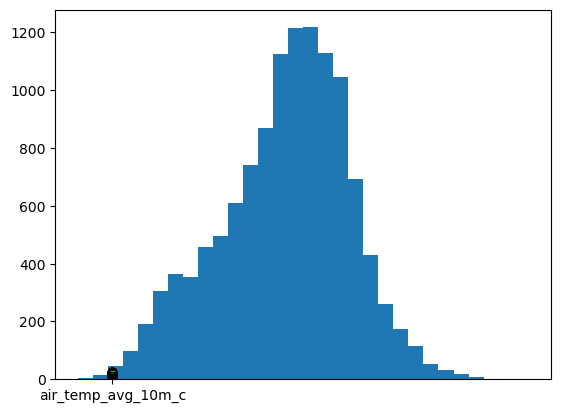

In [91]:
df["wind_speed_avg_10m_m_s"].hist(bins=30)
df["air_temp_avg_10m_c"].plot.box()